## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Initial Feature Selected Models (3) - Spring 2020
----------------------------------------------------------------------


### **Table of Contents:**

0. [Preparing for analyisis](#part3.0)
1. [Initial review and vizualization of the data](#part3.1)
2. [Process the data for Initial Data Models](#part3.2)
3. [Split and run the initial model with selected features](#part3.3)
4. [Evaluate all the methods and compare using ensemble ranking](#part3.4)


## 0. Preparing for Analysis  <a name="part3.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [70]:
# TO USE FOR ENTIRE TEAM
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [71]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [72]:
# Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)

# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

# 1. Initial Review and Vizualization of the Data  <a name="part3.1"></a>

In [73]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [74]:
# Investigate the datatypes and descriptive statistics of the dataset
display(df_base.info())
display(df_base.describe())
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


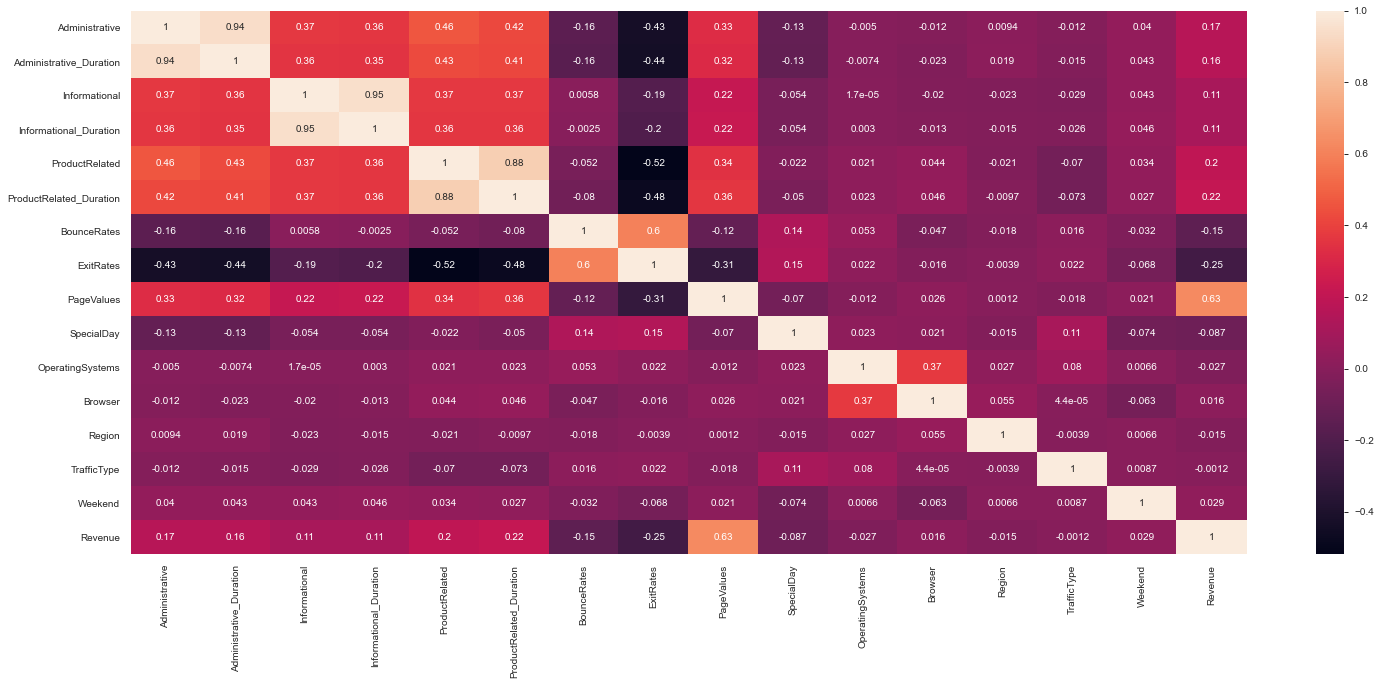

In [75]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

# 2. Process the Data for Initial Data Models  <a name="part3.2"></a>

    2.0 Pipeline [Prep] - Create subsets and list to be used later in the pipeline:

In [76]:
# Create Continuous Variable List
df_continuous = df.iloc[:,:9]
continuous_df_list = df_continuous.columns.tolist()

# Create Categorical Variable List
df_categorical = df.iloc[:,9:-1]
categorical_df_list = df_categorical.columns.tolist()

    2.1 Pipeline [Impute] - Initial Imputation of Categorical Features:

In [77]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [79]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
#df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
# (df.groupby("Revenue")['PageValues']  == 0).count()

In [80]:
# Encode Revenue before splitting the data to allow for modeling

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [81]:
# Bin Categorical Features (Month, OperatingSystems, Browser, Region, TrafficType):

# Reduce months to two holiday bins - one for the months with holidays (Feb and May)and the other for all other months
def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

# Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


# Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

# Bin months into quarters
def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

# Reduce categories for Operating Systems to the top 3 plus "other"
# Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
# Reduce categories for Browser to the top 3 plus "other"
# Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
# Reduce categories for Region to the top 4 plus "other"
# Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
# Reduce categories for TrafficType to the top 3 plus "other"
# TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df

In [82]:
# Add creates features / bins to categorical list
# Create added features list
added_categorical_features = df.iloc[:,-7:]
added_categorical_list = added_categorical_features.columns.tolist()

# Combine added features with categorical list
categorical_df_list = categorical_df_list + added_categorical_list

# Check work by printing categorical list
categorical_df_list

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

    2.2 Pipeline [Transform] - Initial Log Transformation Continuous Features:

In [83]:
# Initial Log Transformation Continuous Features

# Impute Zeros before doing the log
for column in continuous_df_list:
    df[column] = df[column] + 1

display(df[continuous_df_list].sample(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
4931,1,1.000000,1,1.00,7,163.500000,1.000000,1.033333,1.000000
9399,8,645.500000,3,167.50,32,1630.641667,1.000000,1.026063,1.000000
11640,9,164.375000,1,1.00,19,404.416667,1.000000,1.005000,1.000000
8501,1,1.000000,1,1.00,15,170.916667,1.000000,1.076190,1.000000
4991,1,1.000000,1,1.00,4,72.000000,1.100000,1.100000,1.000000
1606,1,1.000000,1,1.00,24,554.150000,1.034783,1.069565,1.000000
10067,1,1.000000,4,63.75,25,681.255952,1.015385,1.038462,73.068223
11717,1,1.000000,1,1.00,14,216.952381,1.000000,1.018182,1.000000
1966,1,1.000000,1,1.00,18,589.666667,1.011765,1.035294,1.000000
268,1,1.000000,1,1.00,16,1560.600000,1.000000,1.033846,1.000000


    2.3 Pipeline [Calcualated Features] - Initial Feature Engineering of continuous features:

In [84]:

df['PageValues_Log'] = np.log(df['PageValues'])

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

# Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions

# Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']


# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']

# Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']


In [85]:
df['Bounce_Exit_Binary'] =  np.where(df['Bounce_Exit_Rate_Avg'] > 1.05,0,1) 

In [86]:
df[['Bounce_Exit_Binary','Bounce_Exit_Rate_Avg']]

,Bounce_Exit_Binary,Bounce_Exit_Rate_Avg
0,0,1.200000
1,1,1.050000
2,0,1.200000
3,0,1.095000
4,1,1.035000
...,...,...
12325,1,1.018087
12326,1,1.010667
12327,0,1.085000
12328,1,1.010526


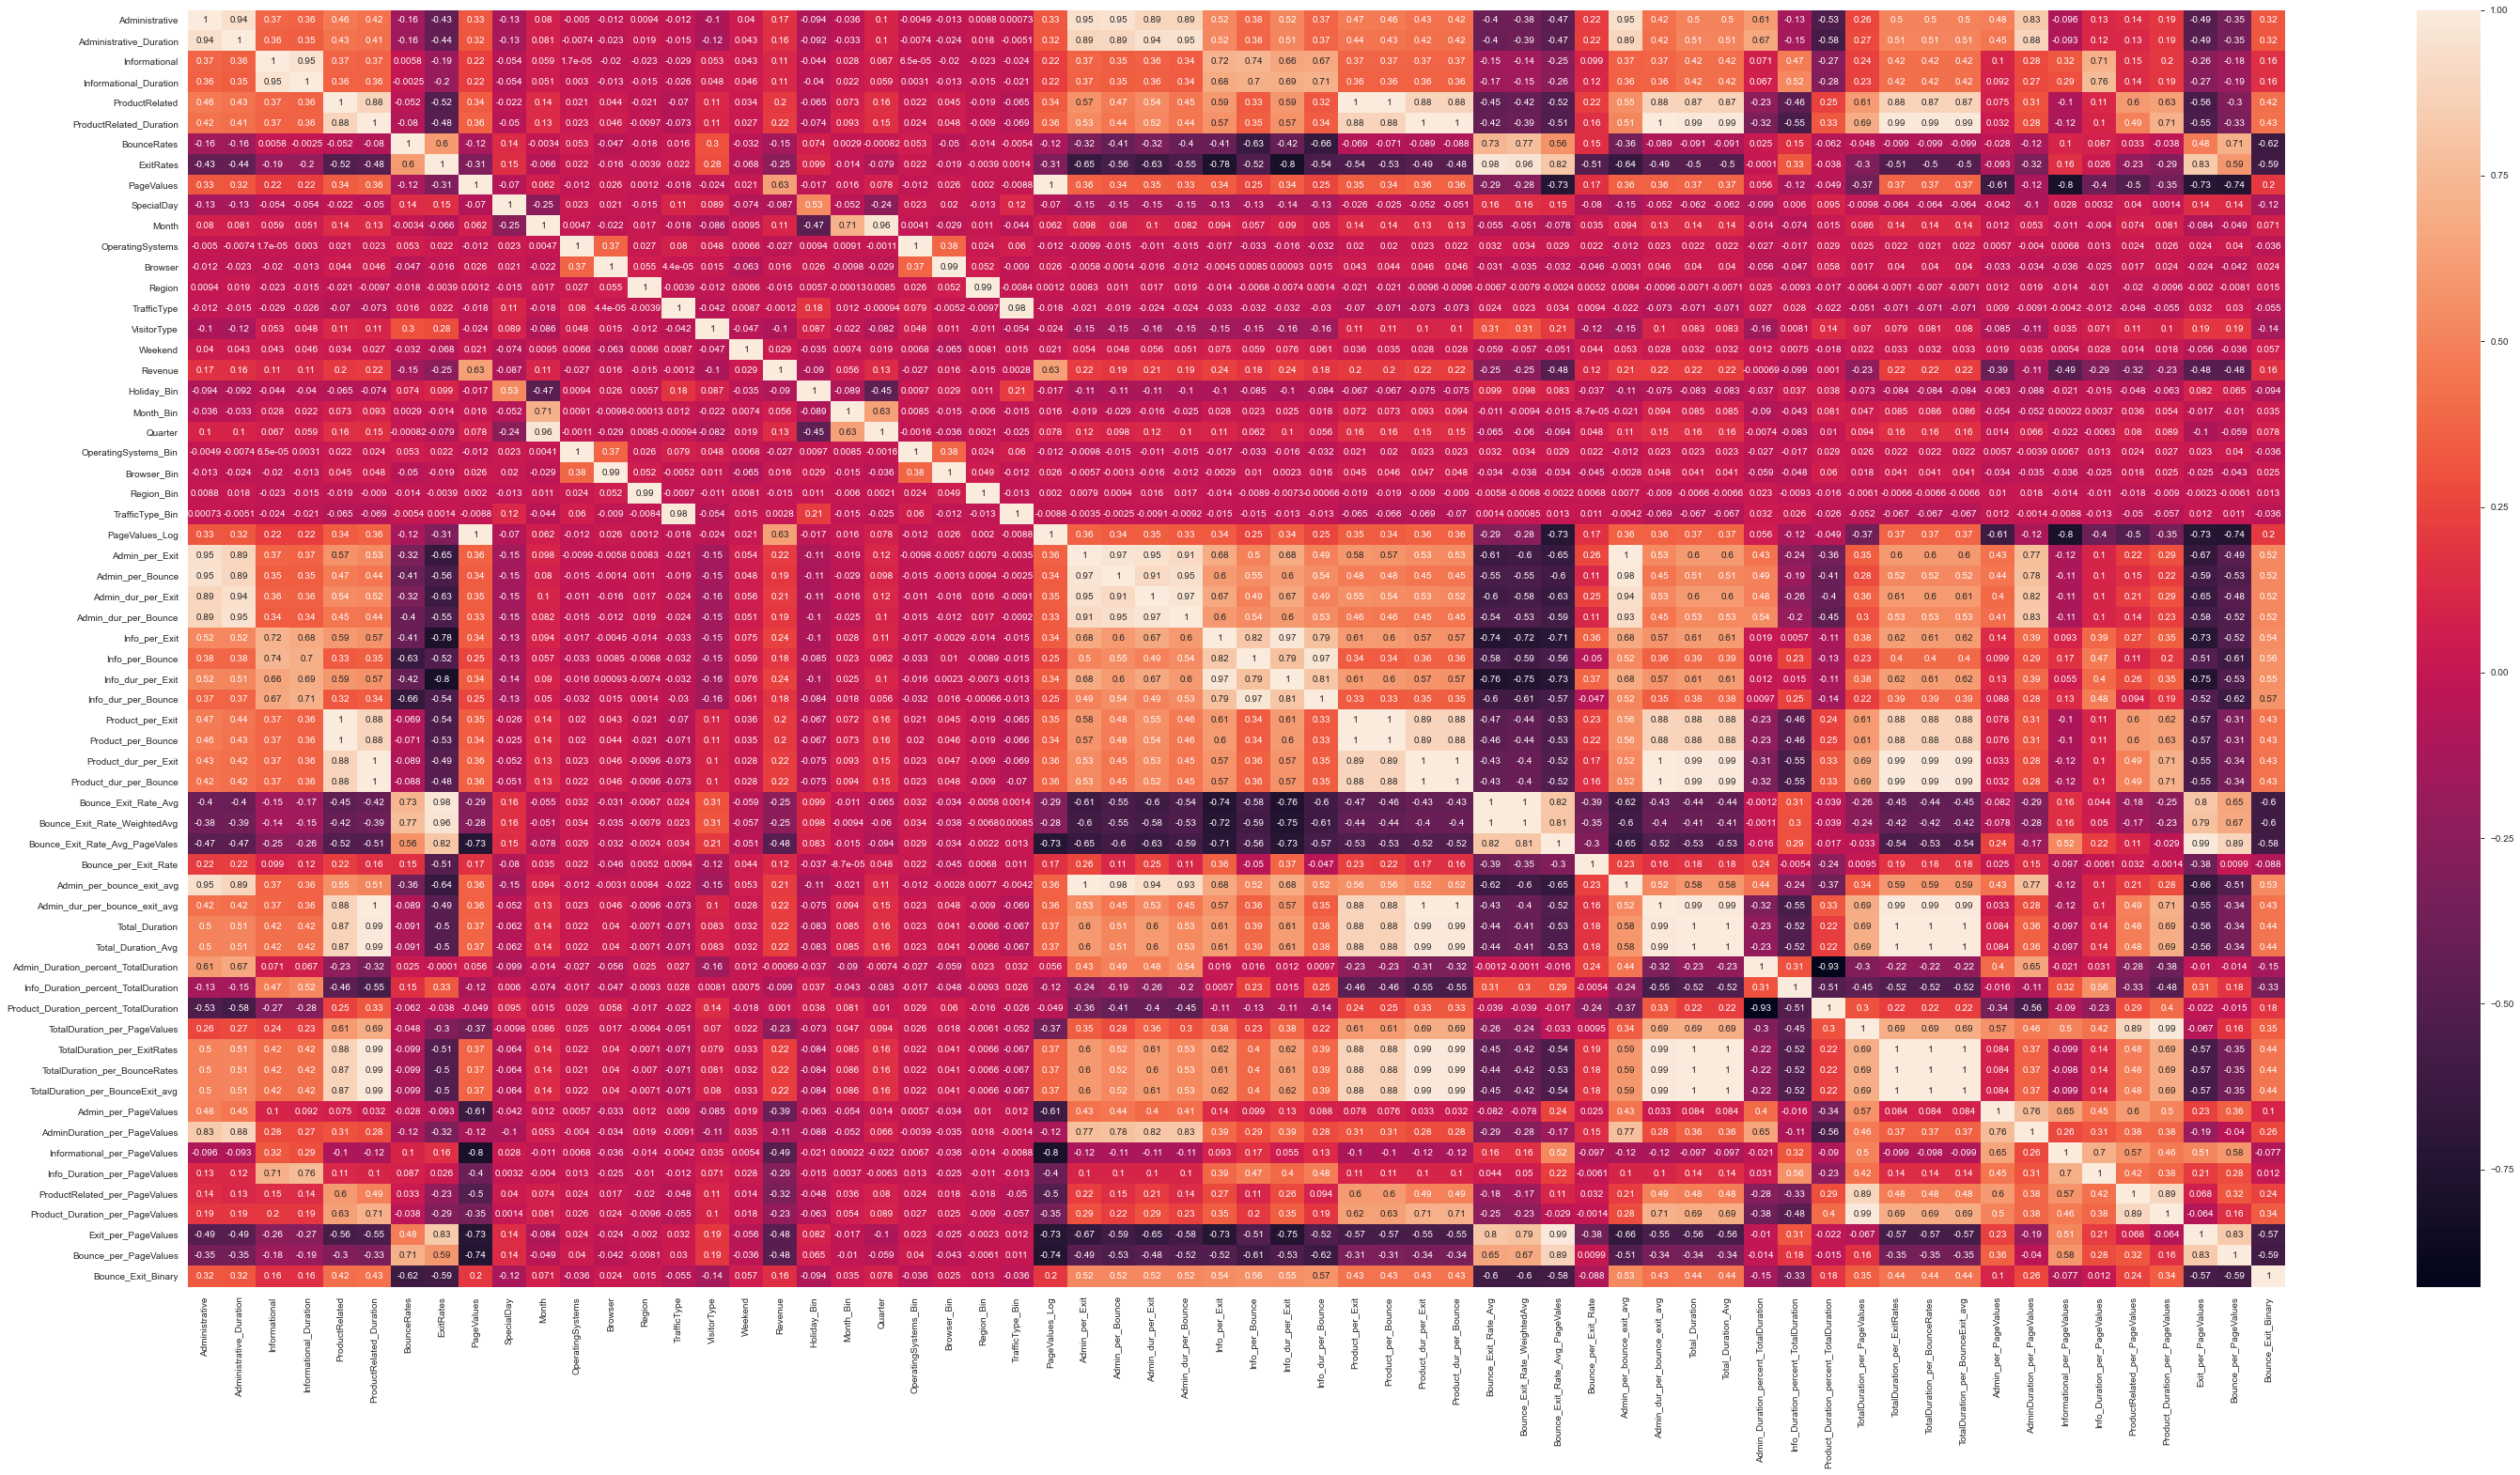

In [53]:
# Correlation Heatmap for the dataframe
spearman2 =df.corr(method ='spearman')
plt.figure(figsize=(50,25))
sns.heatmap(spearman2, annot=True)

In [87]:
# Add transformed and calulated featuers to continuous list

# Create added features list
added_continuous_features = df.iloc[:,-37:]
added_continuous_list = added_continuous_features.columns.tolist()

In [88]:
# Combine added features list with continuous list
continuous_df_list = continuous_df_list + added_continuous_list

In [89]:
# Check work by printing the combined list
continuous_df_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

In [90]:
# Review the created columns in a sample
new_continuous_df = df.loc[:,continuous_df_list]
y = df.loc[:,'Revenue']
display(new_continuous_df.sample(20))

new_categorical_df = df.loc[:,categorical_df_list]
display(new_categorical_df.sample(20))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,PageValues_Log,...,TotalDuration_per_BounceExit_avg,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues,Bounce_Exit_Binary
7780,6,264.733333,2,17.2,98,6080.820000,1.002000,1.017000,4.454874,1.493999,...,6302.876011,1.346839,59.425547,0.448946,3.860940,21.998377,1364.981323,0.228289,0.224922,1
6725,6,142.140000,1,1.0,13,306.240000,1.000000,1.013333,1.000000,0.000000,...,446.403974,6.000000,142.140000,1.000000,1.000000,13.000000,306.240000,1.013333,1.000000,1
12312,8,151.357143,2,10.0,222,11432.001240,1.011149,1.021904,2.582473,0.948748,...,11404.875138,3.097806,58.609377,0.774451,3.872257,85.964108,4426.764794,0.395708,0.391543,1
5380,1,1.000000,1,1.0,51,1157.384921,1.008000,1.035500,1.000000,0.000000,...,1134.705085,1.000000,1.000000,1.000000,1.000000,51.000000,1157.384921,1.035500,1.008000,1
489,3,31.000000,2,149.5,25,1531.194444,1.007407,1.014815,11.102222,2.407145,...,1692.884615,0.270216,2.792234,0.180144,13.465773,2.251801,137.917834,0.091406,0.090739,1
7738,9,122.033333,1,1.0,10,231.833333,1.000000,1.035714,1.000000,0.000000,...,348.640936,9.000000,122.033333,1.000000,1.000000,10.000000,231.833333,1.035714,1.000000,1
11595,1,1.000000,1,1.0,16,1678.178571,1.026667,1.060444,1.000000,0.000000,...,1610.051868,1.000000,1.000000,1.000000,1.000000,16.000000,1678.178571,1.060444,1.026667,1
1798,7,140.000000,1,1.0,30,492.100000,1.000000,1.003333,1.000000,0.000000,...,632.046589,7.000000,140.000000,1.000000,1.000000,30.000000,492.100000,1.003333,1.000000,1
8944,2,20.000000,1,1.0,5,297.916667,1.040000,1.040000,1.000000,0.000000,...,306.650641,2.000000,20.000000,1.000000,1.000000,5.000000,297.916667,1.040000,1.040000,1
3995,3,140.000000,2,21.0,32,961.833333,1.007843,1.025000,1.000000,0.000000,...,1104.692549,3.000000,140.000000,2.000000,21.000000,32.000000,961.833333,1.025000,1.007843,1


,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Holiday_Bin,Month_Bin,Quarter,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin
7630,0.0,7,1,1,1,1,1,0,0,0,3,1,1,1,1
579,0.0,3,2,2,1,2,0,0,0,3,1,2,2,1,2
1599,0.0,3,2,2,1,1,1,0,0,3,1,2,2,1,1
10575,0.0,12,2,2,1,1,1,0,0,12,4,2,2,1,1
8382,0.0,12,2,2,1,6,1,0,0,12,4,2,2,1,4
9100,0.0,12,2,10,1,2,1,0,0,12,4,2,3,1,2
1554,0.0,3,2,5,1,3,1,1,0,3,1,2,3,1,3
10534,0.0,11,2,2,3,3,1,0,0,11,4,2,2,3,3
12200,0.0,12,2,2,6,1,1,1,0,12,4,2,2,5,1
7485,0.0,8,2,2,7,2,0,0,0,0,3,2,2,5,2


    2.4 Pipeline [Middle] - Min Max Standardization

In [91]:
# Process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(new_continuous_df)
scaled = scaler.transform(new_continuous_df)
scaled_continuous_df = pd.DataFrame(scaled,columns = continuous_df_list)
df[continuous_df_list] = scaled_continuous_df[continuous_df_list]

    2.5 Pipeline [Middle] - Normalize the data to address skew

In [92]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(df[continuous_df_list].skew().abs())

# Filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_cols = skew_over.index.tolist()
display(skew_cols)
display(len(skew_cols))

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

46

In [93]:
# Creating the list of cols to adjust for skewness

for i in skew_cols:
    df[i+'_skew'] = df[i]
    
cols_to_skew = df.iloc[:,-len(skew_cols):].columns

continuous_skew_cols = cols_to_skew.tolist()
continuous_df_list = continuous_df_list + continuous_skew_cols

In [94]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(df[cols_to_skew],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
df[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [95]:
# Display the skewness after quantile_transform
display(df[cols_to_skew].skew())

Administrative_skew                            0.114415
Administrative_Duration_skew                   0.144551
Informational_skew                             1.419557
Informational_Duration_skew                    1.557548
ProductRelated_skew                           -0.009360
ProductRelated_Duration_skew                  -0.032811
BounceRates_skew                               0.085643
ExitRates_skew                                 0.028881
PageValues_skew                                1.365839
PageValues_Log_skew                            1.365839
Admin_per_Exit_skew                           -0.028204
Admin_per_Bounce_skew                         -0.014286
Admin_dur_per_Exit_skew                       -0.029313
Admin_dur_per_Bounce_skew                     -0.018813
Info_per_Exit_skew                            -0.028867
Info_per_Bounce_skew                          -0.089731
Info_dur_per_Exit_skew                        -0.029179
Info_dur_per_Bounce_skew                      -0

In [96]:
# Create a list for columns that still need to be adjusted for skewness
Still_skew_df = pd.DataFrame(df[cols_to_skew].skew().abs())

# Filter skew attributes by absolute values of 0.5
still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
# Still_skew_under = Still_skew_df[(Still_skew_df < -0.5).any(axis=1)]
still_skew_list =(still_skew_over.index.tolist())

display(still_skew_list)



['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Admin_per_PageValues_skew',
 'Bounce_Exit_Binary_skew']

In [97]:
# Normalize for remaining columns that continue to have skewness using PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(df[still_skew_list])
transformed = pt.transform((df[still_skew_list]))
transformed_df = pd.DataFrame(transformed,columns = still_skew_list)
df[still_skew_list] = transformed_df[still_skew_list]


In [98]:
# Check for remaining skewness
display(df[still_skew_list].skew())

Informational_skew             1.399378
Informational_Duration_skew    1.539400
PageValues_skew                1.342178
PageValues_Log_skew            1.342178
Admin_per_PageValues_skew      0.189768
Bounce_Exit_Binary_skew       -2.072543
dtype: float64

In [99]:
spearman_possible =df[continuous_df_list].corrwith(df['Revenue'])
spearman_possible.head(60)
# plt.figure(figsize=(30,15))
# sns.heatmap(spearman_possible, annot=True)

Administrative                            0.138917
Administrative_Duration                   0.093587
Informational                             0.095200
Informational_Duration                    0.070345
ProductRelated                            0.158538
ProductRelated_Duration                   0.152373
BounceRates                              -0.150673
ExitRates                                -0.207071
PageValues                                0.492569
PageValues_Log                            0.635069
Admin_per_Exit                            0.142257
Admin_per_Bounce                          0.141216
Admin_dur_per_Exit                        0.094783
Admin_dur_per_Bounce                      0.094327
Info_per_Exit                             0.102644
Info_per_Bounce                           0.100362
Info_dur_per_Exit                         0.071273
Info_dur_per_Bounce                       0.070789
Product_per_Exit                          0.160553
Product_per_Bounce             

In [100]:
corr_df = pd.DataFrame(df[continuous_df_list].corrwith(df['Revenue']).abs())

#filter skew attributes by absolute values of 0.20
corr_over = corr_df[(corr_df > 0.20).any(axis=1)]
#display(corr_over.index)

continuous_model_cols = corr_over.index.tolist()
display(continuous_model_cols)
display(len(continuous_model_cols))

['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues',
 'ProductRelated_Duration_skew',
 'ExitRates_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Admin_per_Exit_skew',
 'Admin_dur_per_Exit_skew',
 'Info_per_Exit_skew',
 'Info_dur_per_Exit_skew',
 'Product_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Product_dur_per_Exit_skew',
 'Product_dur_per_Bounce_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Total_Duration_skew',
 'Total_Duration_Avg_skew',
 'TotalDuration_per_PageValues_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'Admin_per_PageValues_skew',
 'Informational_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'ProductRelated_per_Pag

37

In [101]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues',
 'ProductRelated_Duration_skew',
 'ExitRates_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Admin_per_Exit_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Product_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Prod_per_bounce_exit_avg_skew',
 'Product_dur_per_Exit_skew',
 'Product_dur_per_Bounce_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Total_Duration_skew',
 'Total_Duration_Avg_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'Admin_per_PageValues_skew',
 'Informational_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'TotalDuration_per_PageValues_skew',
 'Exit_per_PageValues_skew',
 'Bounce_per_PageValues_skew','Revenue']    
possible_Features_list.sort()
possible_Features_list

['Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_per_PageValues',
 'Bounce_per_PageValues_skew',
 'ExitRates',
 'ExitRates_skew',
 'Exit_per_PageValues',
 'Exit_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Informational_per_PageValues',
 'Informational_per_PageValues_skew',
 'PageValues',
 'PageValues_Log',
 'PageValues_Log_skew',
 'PageValues_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Prod_per_bounce_exit_avg_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'Product_dur_per_Bounce_skew',
 'Product_dur_per_Exit_skew',
 '

In [102]:
sorted_possible_Features_list = ['Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_per_PageValues',
 'Bounce_per_PageValues_skew',
 'ExitRates',
 'ExitRates_skew',
 'Exit_per_PageValues',
 'Exit_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Informational_per_PageValues',
 'Informational_per_PageValues_skew',
 'PageValues',
 'PageValues_Log',
 'PageValues_Log_skew',
 'PageValues_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Prod_per_bounce_exit_avg_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'Product_dur_per_Bounce_skew',
 'Product_dur_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Product_per_Exit_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_PageValues_skew',
 'Total_Duration_Avg_skew',
 'Total_Duration_skew',
 'Revenue']

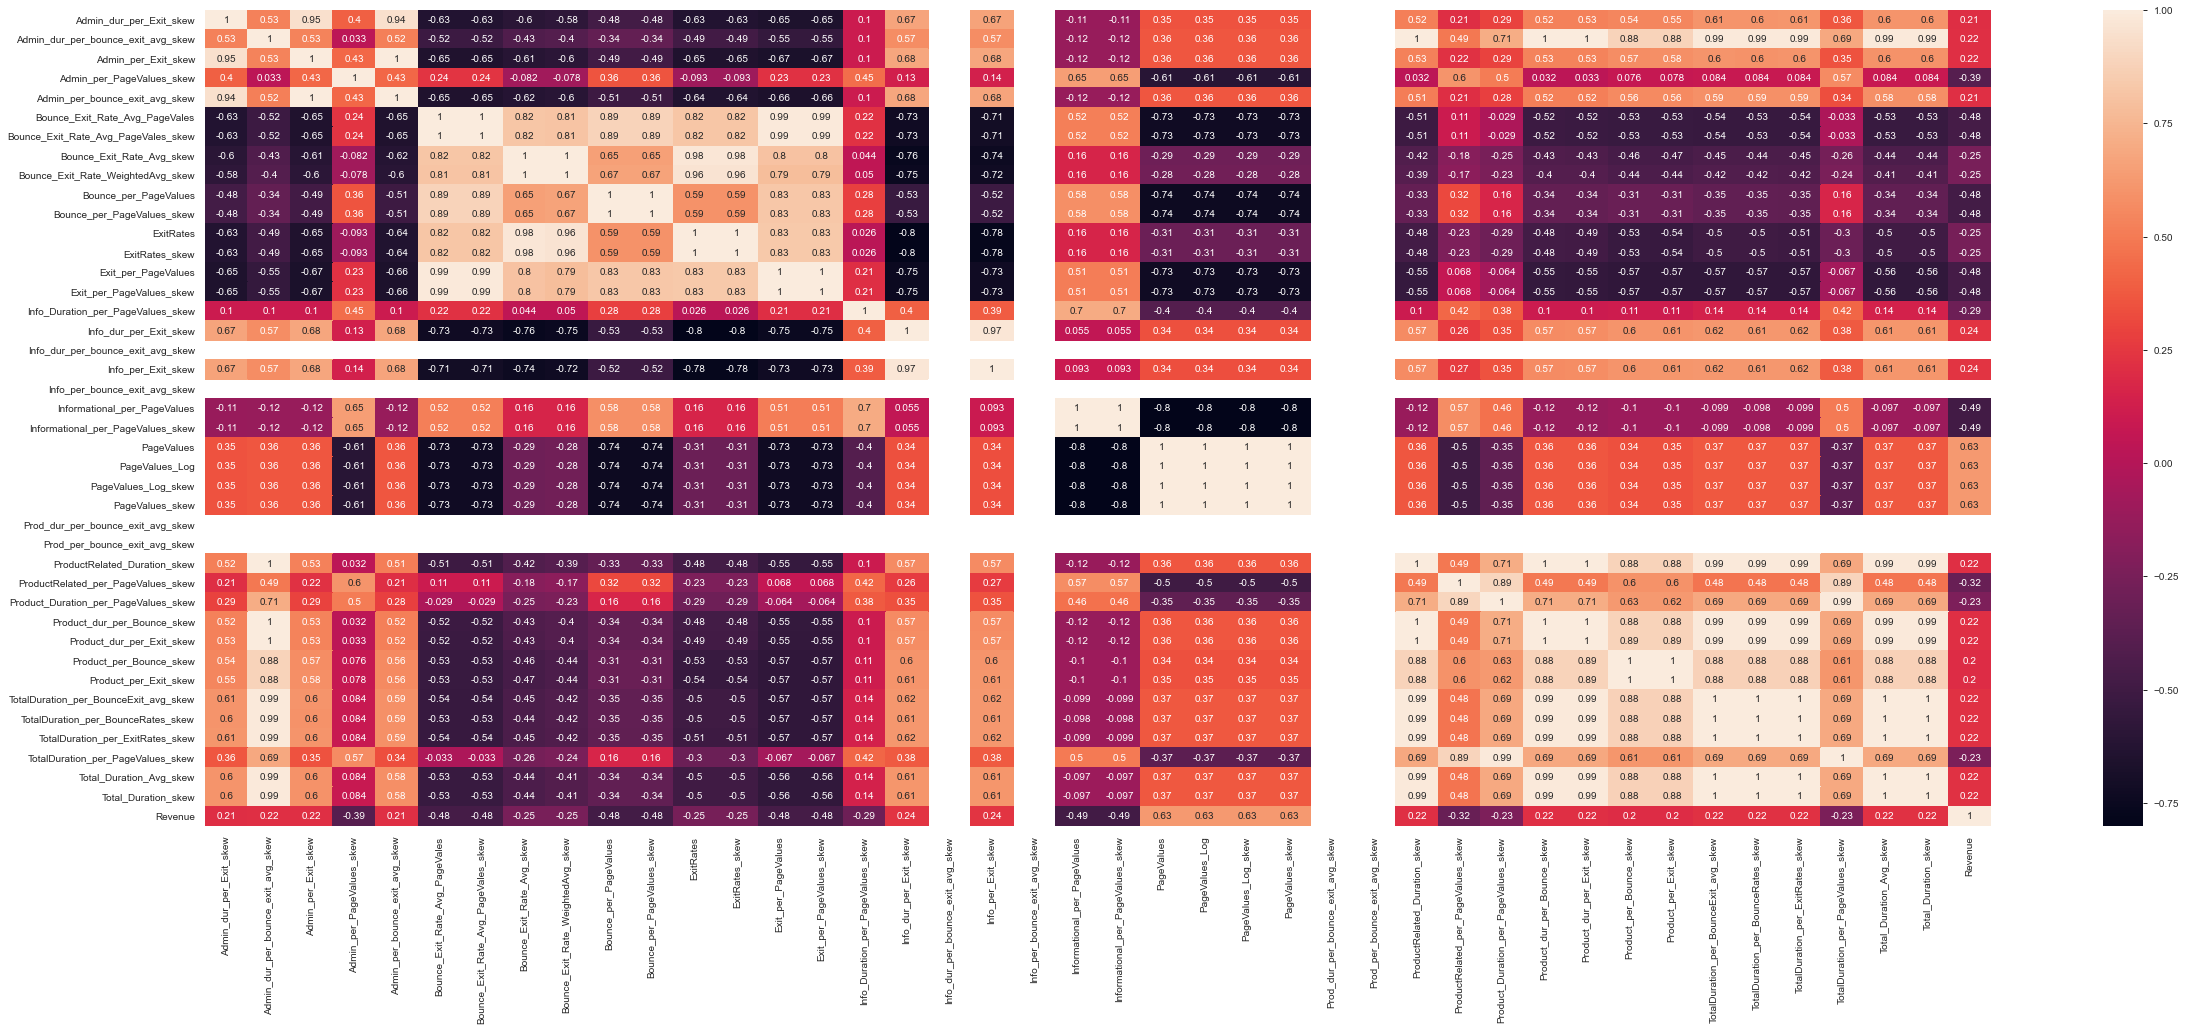

In [30]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df.loc[:,sorted_possible_Features_list]

spearman_possible =possible_Corr_df.corr(method= 'spearman')
plt.figure(figsize=(40,15))
sns.heatmap(spearman_possible, annot=True)

In [31]:
# ['Admin_dur_per_Exit_skew',
#  'Admin_dur_per_bounce_exit_avg_skew',
#  'Admin_per_Exit_skew', KEEP HIGHEST CORRELATION WITH Y
#  'Admin_per_bounce_exit_avg_skew',

#  Admin_per_PageValues_skew KEEP UNIQUELY INCLUDES ADMIN
 
#  'Bounce_Exit_Rate_Avg_skew', KEEP NO JUSTIFICATION FOR WEIGHTED AVERAGE
#  'Bounce_Exit_Rate_WeightedAvg_skew', 
 
#  'Bounce_Exit_Rate_Avg_PageVales',
#  'Bounce_Exit_Rate_Avg_PageVales_skew',
#  'Bounce_per_PageValues',
#  'Bounce_per_PageValues_skew',KEEP BECAUSE ADJUSTED FOR SKEWNESS AND ALEADY HAVE A VARIABLE WITH BOUNCE EXIT RATE AVERAGE
 

 
#  'ExitRates',
#  'ExitRates_skew',
#  'Exit_per_PageValues',
#  'Exit_per_PageValues_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS MORE CORRELATED WITH Y THAT THE OTHER EXIT Rate variables
 
#  'Info_Duration_per_PageValues_skew',
# 'Informational_per_PageValues',
#  'Informational_per_PageValues_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS MORE CORRELATED WITH Y

#  'Info_dur_per_Exit_skew',
#  'Info_dur_per_bounce_exit_avg_skew',
#  'Info_per_Exit_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS consistent IN CORRELATED AND SAME COMPARISON AS THE OTHER VARIABLES
#  'Info_per_bounce_exit_avg_skew',

 
#  'PageValues',
#  'PageValues_Log',
#  'PageValues_Log_skew', KEEP PER TAO , KEEP LET FEATURE SELECTION ELIMINATE
#  'PageValues_skew',
 
#  'Prod_dur_per_bounce_exit_avg_skew',
#  'Prod_per_bounce_exit_avg_skew',
# 'Product_dur_per_Exit_skew', 
# 'Product_per_Exit_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS consistent IN CORRELATED AND SAME COMPARISON AS THE OTHER VARIABLES
# 'Product_dur_per_Bounce_skew',
#  'Product_per_Bounce_skew',
 
#  'ProductRelated_Duration_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE
 
#  'ProductRelated_per_PageValues_skew', KEEP CLEAR WINNER IN CORRELATION TO Y
#  'Product_Duration_per_PageValues_skew',

#  'TotalDuration_per_BounceExit_avg_skew',
#  'TotalDuration_per_BounceRates_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE OTHER VARIABLES USE EXITRATES
#  'TotalDuration_per_ExitRates_skew',
 
#  'TotalDuration_per_PageValues_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE

#  'Total_Duration_Avg_skew', 
#  'Total_Duration_skew', KEEP LET FEATURE SELECTION ELIMINATE
#  'Revenue']

In [32]:
# Filtered out intercorrelated featues for feature importance
continuous_feature_selection = ['Admin_per_Exit_skew','Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew','Bounce_per_PageValues_skew','Exit_per_PageValues_skew','Informational_per_PageValues_skew','Info_per_Exit_skew','PageValues_Log_skew',
'Product_per_Exit_skew','ProductRelated_Duration_skew','ProductRelated_per_PageValues_skew','TotalDuration_per_BounceRates_skew','TotalDuration_per_PageValues_skew','Total_Duration_skew']

display(len(continuous_feature_selection))

14

# Based on the above:
    - Need to choose only one of the variables for which there is a corresponding duration variable - namely: 
    - Administrative_skew or Administrative_Duration_skew (correlation 0.94); initial decision is to utilize Administrative_skew as it is more highly correlated with the target variable
    - Informational_skew or Informational_Duration_skew (correlation 0.95); initial decision is to utilize Informational_skew because Informational_Duration_skew is incorporated into the Total_Duration variables (discussed below)
    - ProductRelated_skew or Product_RelatedDuration_skew (correlation 0.88); initial decision is to utilize ProductRelated_Duration_skew as it is more highly correlated with the target variable

    - Need to choose only one of the variables that are 100% corelated – namely:
    - The PageValues variables (since they all are 100% correlated); initial decision is to use PagesValues_skew (rather than PageValues_Log_skew or PageValues_Log10_skew) because the “raw” feature is more interpretable than its logged counterparts
    - Total_Duration_skew and Total_Duration_Avg_skew; initial decision is to forego both in favor of engineered features that incorporate total duration
    - Bounce_Exit_Rate_Avg_skew and Bounce_Exit_Rate_WeightedAvg_skew; initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted average, which gives relative weights to the inputs

    - Need to carefully consider variables containing “Bounce” and “Exit” since BounceRates_skew and ExitRates_skew are highly correlated (correlation 0.60) – namely:
    - ExitRates_skew and Bounce_Exit_Rate_Avg_skew (correlation 0.98) as well as ExitRates_skew and  Bounce_Exit_Rate_WeightedAvg_skew (correlation 0.96); initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted                 average, which gives relative weights to the inputs
    - Admin_per_Exit_skew and Admin_per_Bounce_skew (correlation 0.97) Initial decision is to use Admin_per Exit_skew because it is more highly correlated with the target variable.

    - Exit_per_PageValues and Bounce_per_PageValues (correlation 0.82) Initial decision is to use Bounce_per_PageValues because it has fewer high correlations with the other variables 

**Need to choose only one of the variables from pairs that capture related information - namely:**
    
    - TotalDuration_per_PageValues_skew or Product_Duration_per_PageValues_skew (correlation 0.99) Initial decision is to use Product_Duration_per_PageValues_skew because it is more highly correlated with the target variable.
    - Admin_per_PageValues_skew and AdminDuration_per_PageValues_skew (correlation 0.76); initial decision is to include Admin_per_PageValues_skew since it is much more highly correlated with y

**Additionally, we recommend including**
   
    - Month because retail businesses are seasonal; and
    - VisitorType because of the importance of customer loyalty in a retail environment




Categorical Features Manual Filter

In [33]:
#Correlation Heatmap for the dataframe
cat_Corr_df = df.loc[:,categorical_df_list]

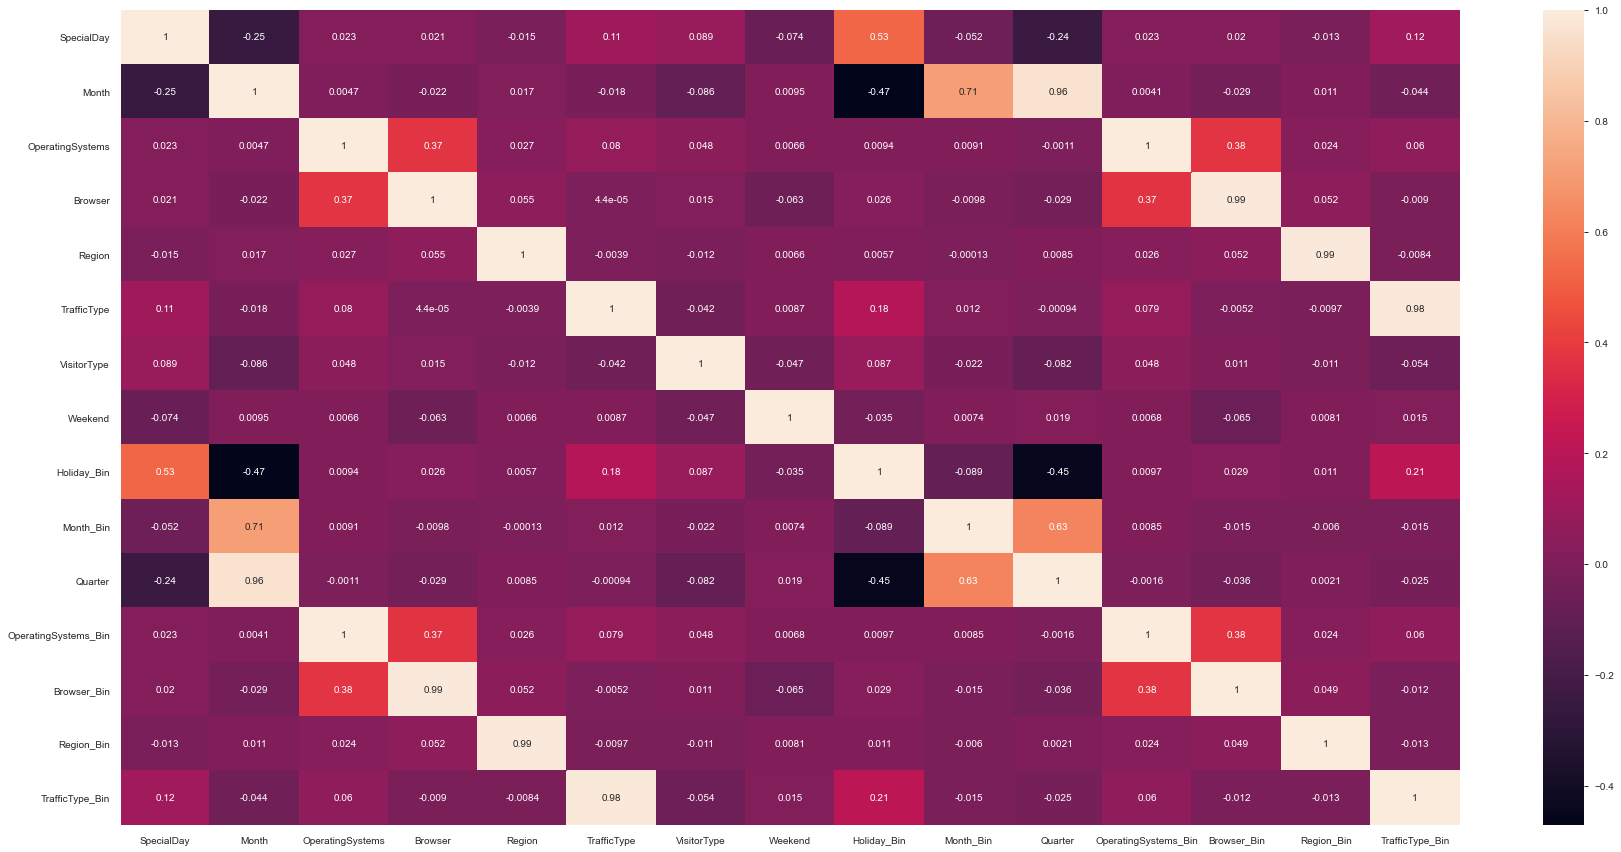

In [34]:
cat_spearman_possible =cat_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(cat_spearman_possible, annot=True)

In [35]:
Cat_feature_selection =['SpecialDay','VisitorType','Weekend','Holiday_Bin','Month_Bin','Quarter','OperatingSystems_Bin','Browser_Bin','Region_Bin','TrafficType_Bin']

# Based on the above:
    - Need to choose only one of the variables for which there is a corresponding duration variable - namely: 
    - Administrative_skew or Administrative_Duration_skew (correlation 0.94); initial decision is to utilize Administrative_skew as it is more highly correlated with the target variable
    - Informational_skew or Informational_Duration_skew (correlation 0.95); initial decision is to utilize Informational_skew because Informational_Duration_skew is incorporated into the Total_Duration variables (discussed below)
    - ProductRelated_skew or Product_RelatedDuration_skew (correlation 0.88); initial decision is to utilize ProductRelated_Duration_skew as it is more highly correlated with the target variable

    - Need to choose only one of the variables that are 100% corelated – namely:
    - The PageValues variables (since they all are 100% correlated); initial decision is to use PagesValues_skew (rather than PageValues_Log_skew or PageValues_Log10_skew) because the “raw” feature is more interpretable than its logged counterparts
    - Total_Duration_skew and Total_Duration_Avg_skew; initial decision is to forego both in favor of engineered features that incorporate total duration
    - Bounce_Exit_Rate_Avg_skew and Bounce_Exit_Rate_WeightedAvg_skew; initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted average, which gives relative weights to the inputs

    - Need to carefully consider variables containing “Bounce” and “Exit” since BounceRates_skew and ExitRates_skew are highly correlated (correlation 0.60) – namely:
    - ExitRates_skew and Bounce_Exit_Rate_Avg_skew (correlation 0.98) as well as ExitRates_skew and  Bounce_Exit_Rate_WeightedAvg_skew (correlation 0.96); initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted                 average, which gives relative weights to the inputs
    - Admin_per_Exit_skew and Admin_per_Bounce_skew (correlation 0.97) Initial decision is to use Admin_per Exit_skew because it is more highly correlated with the target variable.

    - Exit_per_PageValues and Bounce_per_PageValues (correlation 0.82) Initial decision is to use Bounce_per_PageValues because it has fewer high correlations with the other variables 

**Need to choose only one of the variables from pairs that capture related information - namely:**
    
    - TotalDuration_per_PageValues_skew or Product_Duration_per_PageValues_skew (correlation 0.99) Initial decision is to use Product_Duration_per_PageValues_skew because it is more highly correlated with the target variable.
    - Admin_per_PageValues_skew and AdminDuration_per_PageValues_skew (correlation 0.76); initial decision is to include Admin_per_PageValues_skew since it is much more highly correlated with y

**Additionally, we recommend including**
   
    - Month because retail businesses are seasonal; and
    - VisitorType because of the importance of customer loyalty in a retail environment




In [36]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = Cat_feature_selection + continuous_feature_selection
display(feature_importance_list,len(feature_importance_list))

['SpecialDay',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_per_PageValues_skew',
 'Exit_per_PageValues_skew',
 'Informational_per_PageValues_skew',
 'Info_per_Exit_skew',
 'PageValues_Log_skew',
 'Product_per_Exit_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_PageValues_skew',
 'Total_Duration_skew']

24

# 3. Split and Run the Initial Model with Selected Features  <a name="part3.3"></a>

In [104]:
# Create a list of continuous and categorica features based on additional data preparation
#continuous_categorical_list = feature_importance_list

# Resplit features (X) and target (y) in the dataset
X,y = df.loc[:,'Bounce_Exit_Binary_skew'],df.loc[:,'Revenue']

In [105]:
# Resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> F1 Score: </b> .88
<br><b> AUC: </b> .87
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [106]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#### Feature Importance: Forward Selection

In [107]:
# Source: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
# Forward Selection Feature Importance to determine the best features for this model

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [108]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

AttributeError: 'Series' object has no attribute 'columns'

#### Build/Evaluate the Model 

In [42]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [109]:
# Train the model using the training sets - for y (Sale)
gnb.fit(X_train['Bounce_Exit_Binary_skew'], y_train)

# Predict the response for test dataset for y
y_NB_pred = gnb.predict(X_test['Bounce_Exit_Binary_skew'])

# Model Accuracy, how often is the classifier correct?
# Accuracy for y
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

# Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

# AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test['Bounce_Exit_Binary_skew'])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


NameError: name 'gnb' is not defined

### 3.2 Decision Tree Model (DT)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .73
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [44]:
# Load Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

#### Specify the Model and Run Feature Selection

In [45]:
# Using SelectFromModel to run feature selecion
from sklearn.feature_selection import SelectFromModel

embeded_dt_selector = SelectFromModel(DecisionTreeClassifier(), max_features=20)
embeded_dt_selector.fit(X_train, y_train)
embeded_dt_support = embeded_dt_selector.get_support()
embeded_dt_feature = X_train.loc[:,embeded_dt_support].columns.tolist()
print(str(len(embeded_dt_feature)), 'selected features')
print(embeded_dt_feature)

5 selected features
['Admin_per_Exit_skew', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Product_per_Exit_skew', 'TotalDuration_per_PageValues_skew']


#### Build/Evaluate the Model

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train[embeded_dt_feature],y_train)

# Predict the response for test dataset
y_DT_pred = clf.predict(X_test[embeded_dt_feature])

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8534739118680724


In [48]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3158
           1       0.50      0.53      0.51       541

    accuracy                           0.85      3699
   macro avg       0.71      0.72      0.71      3699
weighted avg       0.86      0.85      0.86      3699



In [49]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2872  286]
 [ 256  285]]


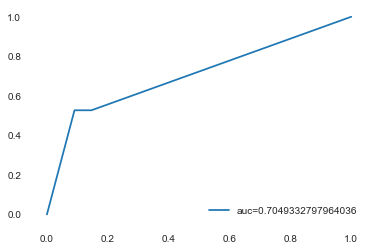

Text(0.5, 257.44, 'Predicted label')

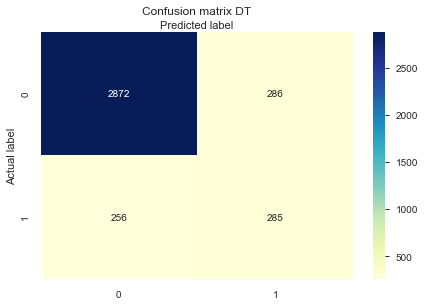

In [50]:
# AUC for y
y_DT_pred_proba = clf.predict_proba(X_test[embeded_dt_feature])[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.3 Random Forest Model (RF)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .92
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [51]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

#### Feature Selection: SelectFromModel

In [52]:
# Using SelectFromModel to run Feature Selection

from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=24)
embeded_rf_selector.fit(X_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

11 selected features
['Admin_per_Exit_skew', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'PageValues_Log_skew', 'Product_per_Exit_skew', 'ProductRelated_Duration_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_PageValues_skew']


#### Specify the Model

In [53]:
# Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train[embeded_rf_feature],y_train)

y_RF_pred = rfc.predict(X_test[embeded_rf_feature])

#### Evaluate the Model

In [54]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.67      0.55      0.60       541

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.89      0.89      0.89      3699



[[3008  150]
 [ 243  298]]


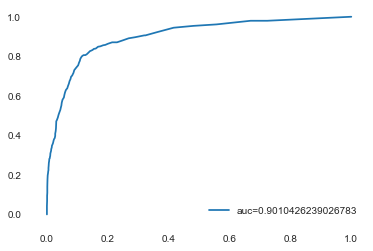

Text(0.5, 257.44, 'Predicted label')

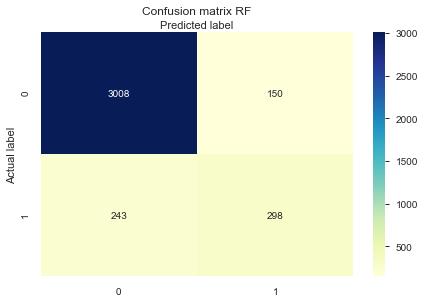

In [55]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

# AUC for y
y_RF_pred_proba = rfc.predict_proba(X_test[embeded_rf_feature])[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .82
<br><b> Next Steps: </b> SVC ensemble classifiers 

#### Import Packages

In [56]:
# Import Support Vector Machines model
from sklearn import svm

#### Feature Selection: SelectFromModel

In [57]:
# Using RFE to run feature selection

from sklearn.feature_selection import RFE
svc = svm.SVC(kernel='linear',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)

svc_selector = RFE(estimator=svc, n_features_to_select=14, step=20, verbose=5)
svc_selector.fit(X_train, y_train)
svc_support = svc_selector.get_support()
svc_feature = X_train.loc[:,svc_support].columns.tolist()

print(str(len(svc_feature)), 'selected features')
print(svc_feature)

Fitting estimator with 24 features.
14 selected features
['SpecialDay', 'Holiday_Bin', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'Info_per_Exit_skew', 'PageValues_Log_skew', 'Product_per_Exit_skew', 'ProductRelated_Duration_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_BounceRates_skew', 'Total_Duration_skew']


#### Specify/Build the Model

In [58]:
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#### Build/Evaluate the Model

In [59]:
# Train the model using the training sets
svc.fit(X_train[svc_feature], y_train)

# Predict the response for test dataset
y_pred_svc = svc.predict(X_test[svc_feature])

Accuracy_svc: 0.9010543390105434
[[3015  143]
 [ 223  318]]


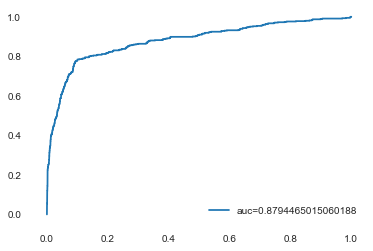


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.69      0.59      0.63       541

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699

Accuracy_svc: 0.9010543390105434


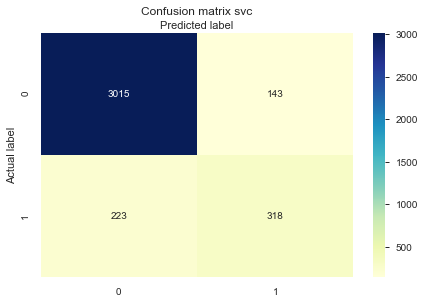

In [60]:
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


# AUC for y1
y_SVM_pred_proba = svc.predict_proba(X_test[svc_feature])[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

##### Conclusion - With an F1 score of .90 the SVM model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.5. XGBoost Model (XGB)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [61]:
# Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


#### Specify the Model and Run Feature Selection

In [62]:
# Instantiate an XGBoost Classifer Model
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


In [63]:
# Source: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784
# Use LassoCV to run Feature Selection

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 
#lasso_support = regr.get_support()

LassoCV Best Alpha Scored:  0.00022150867651258457
LassoCV Model Accuracy:  0.3924275089467305
Variables Eliminated:  3
Variables Kept:  21


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

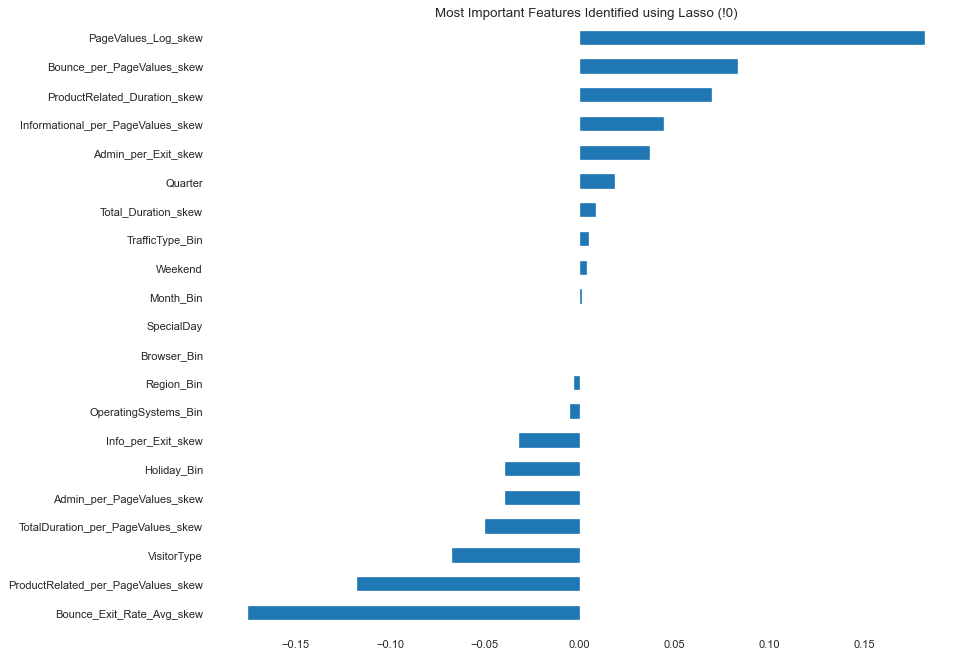

In [64]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [65]:
top_coef_df =pd.DataFrame(top_coef)
lasso_best =top_coef_df.tail(10).index.tolist()

#### Generate Test Data, Build the Models & Assess the Models

In [66]:
# Put Data into structure for XGBoost 
data_dmatrix = xgb.DMatrix(data=X,label=y)

# Train the model using the training sets
XGB_class.fit(X_train[lasso_best], y_train)

# Predict the response for test dataset
y_XGB_pred = XGB_class.predict(X_test[lasso_best])

# Calculate RMSE 
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

# Create error ratio to evaluate results
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

XGBoost's RMSE for y2 is: 0.325952
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.325952


y Accuracy: 0.8937550689375506

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.65      0.59      0.62       541

    accuracy                           0.89      3699
   macro avg       0.79      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



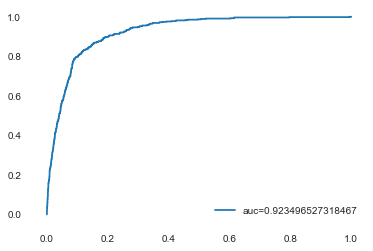

Text(0.5, 257.44, 'Predicted label')

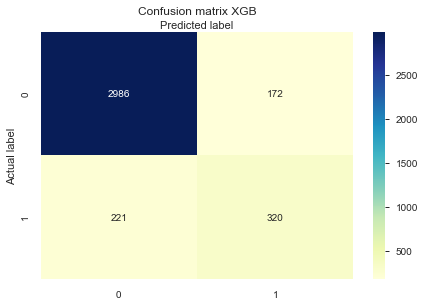

In [67]:
# Model Accuracy, how often is the classifier correct?
# Accuracy
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")

class_names=[0,1] # name  of classes
# Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

# AUC
y_XGB_pred_proba = XGB_class.predict_proba(X_test[lasso_best])[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.6 Neural Network Model (NN)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .92
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model and Run Forward Selection Feature Importance

In [68]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test

# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(10), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

In [69]:
nn_feature_selection = best_features

In [70]:
# Train the model
mlp.fit(X_train[nn_feature_selection], y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1000, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

#### Build/Evaluate the Model

In [71]:
# Build the Model
y_pred_nn = mlp.predict(X_test[nn_feature_selection])


MLP score is 0.8969991889699919
Accuracy_nn: 0.8969991889699919
[[3021  137]
 [ 244  297]]


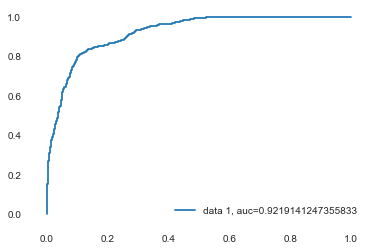

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.68      0.55      0.61       541

    accuracy                           0.90      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.89      0.90      0.89      3699

Accuracy_svc: 0.8969991889699919


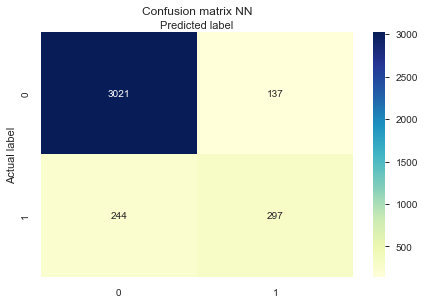

In [72]:
#Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",mlp.score(X_test[nn_feature_selection],y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = mlp.predict_proba(X_test[nn_feature_selection])[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

##### Conclusion - With an F1 score of .89 the NN model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.7 Logistic Regression Model

>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [73]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

#### Specify Modely and Run Feature Selection

In [74]:
# Use SelectFromModel to run Feature Selection
from sklearn.feature_selection import SelectFromModel

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

8 selected features
['VisitorType', 'Holiday_Bin', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'PageValues_Log_skew', 'ProductRelated_per_PageValues_skew']


#### Build/Evaluate the Model

In [75]:
# Build the Model
# fit the model with data
logreg.fit(X_train[embeded_lr_feature],y_train)

y_LR_pred=logreg.predict(X_test[embeded_lr_feature])

In [76]:
# Assess the Model
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[2959,  199],
       [ 207,  334]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

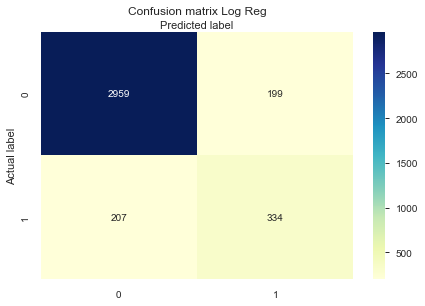

In [77]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

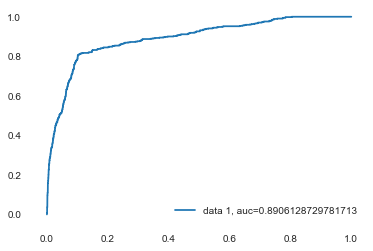

In [78]:
# ROC Curve
y_LR_pred_proba = logreg.predict_proba(X_test[embeded_lr_feature])[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [79]:
print(metrics.classification_report(y_test, y_LR_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3158
           1       0.63      0.62      0.62       541

    accuracy                           0.89      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.89      0.89      0.89      3699



# 4. Evaluate all the methods and compare using ensemble ranking  <a name="part3.4"></a>

In [80]:
DT_FS = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
RF_FS = RandomForestClassifier(n_estimators=100)
SVM_FS = SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)
XGB_FS = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)
GNB_FS = GaussianNB()
LR_FS = LogisticRegression()
NN_FS = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(7,3), learning_rate='adaptive',learning_rate_init=0.01, max_iter=10000, momentum=0.9,nesterovs_momentum=True, power_t=0.5, random_state=1000,shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=True)


>lr 0.630 (0.028)
>xgb 0.652 (0.028)
>tree 0.632 (0.032)
>svm 0.662 (0.030)
>nn 0.648 (0.037)
>bayes 0.660 (0.025)
>rforest 0.642 (0.029)


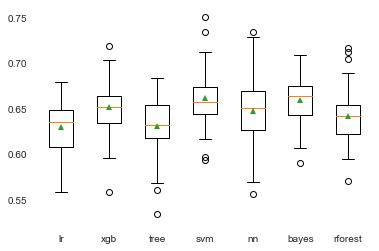

In [81]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LR_FS
    models['xgb'] = XGB_FS
    models['tree'] = DT_FS
    models['svm'] = SVM_FS
    models['nn'] = NN_FS
    models['bayes'] = GNB_FS
    models['rforest'] = RF_FS
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=500)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# define dataset
#X, y = X_test,y_test
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()